In [1]:
# Imports for the model
import spacy
import pandas as pd
from seqeval.metrics import classification_report
from collections import defaultdict

# Load the NERC model from spaCy
nlp = spacy.load("en_core_web_sm")

# Load the test data from the NER-test TSV file 
df = pd.read_csv("NER-test.tsv", sep="\t")

# Group tokens by sentence ID to rebuild full sentences
sentences = defaultdict(list)
for _, row in df.iterrows():
    sentences[row["sentence_id"]].append((row["token"], row["BIO_NER_tag"]))

# Lists to store the true gold BIO tags and predicted BIO tags
true_labels = []
pred_labels = []

# Process each sentence
for tokens in sentences.values():
    # Separate the tokens and the true gold BIO tags
    tokens_list = [t for t, _ in tokens]
    gold_tags = [t for _, t in tokens]
    true_labels.append(gold_tags)

    # Join tokens into a single string for spaCy to process
    text = " ".join(tokens_list)
    doc = nlp(text)

    # Start with a list of "O" tags as a default  
    pred_tags = ["O"] * len(tokens_list)

    # For each named entity predicted by spaCy
    for ent in doc.ents:
        # Split the entity text into individual words (tokens)
        ent_tokens = ent.text.split()

        # Try to find the position of this entity in our token list
        for i in range(len(tokens_list)):
            # Check if a sequence in the token list matches the entity tokens
            if tokens_list[i:i+len(ent_tokens)] == ent_tokens:
                # Mark the first token of the entity with "B-LABEL" for 'beginning'
                pred_tags[i] = "B-" + ent.label_
                # Mark the rest with "I-LABEL" for 'inside'
                for j in range(1, len(ent_tokens)):
                    pred_tags[i + j] = "I-" + ent.label_
                break  # Stop searching after the first match

    # Add the predicted tags for this sentence
    pred_labels.append(pred_tags)

# Print a classification report comparing gold and predicted tags
print(classification_report(true_labels, pred_labels))



              precision    recall  f1-score   support

    CARDINAL       0.00      0.00      0.00         0
        DATE       0.00      0.00      0.00         0
       EVENT       0.00      0.00      0.00         0
         GPE       0.00      0.00      0.00         0
    LOCATION       0.00      0.00      0.00         3
         ORG       0.50      0.50      0.50         8
      PERSON       0.58      0.58      0.58        12
 WORK_OF_ART       0.33      0.17      0.22         6

   micro avg       0.38      0.41      0.39        29
   macro avg       0.18      0.16      0.16        29
weighted avg       0.45      0.41      0.43        29



c:\Users\jespe\anaconda3\envs\Text_mining_3_12\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jespe\anaconda3\envs\Text_mining_3_12\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import spacy
from spacy import displacy

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Process with spaCy
doc = nlp(text)

# Render inline in the notebook
displacy.render(doc, style="ent")


ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\jespe\anaconda3\envs\Text_mining_3_12\Lib\site-packages\IPython\core\display.py)

c:\Users\jespe\anaconda3\envs\Text_mining_3_12\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jespe\anaconda3\envs\Text_mining_3_12\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


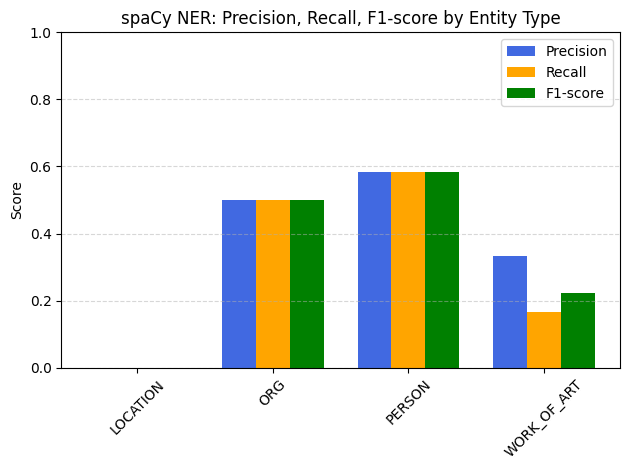

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from seqeval.metrics import classification_report

# Get classification report as dictionary
report_dict = classification_report(true_labels, pred_labels, output_dict=True)

# Filter out only valid entity labels (exclude avg and those with 0 support)
labels = [
    label for label in report_dict.keys()
    if label not in ['accuracy', 'macro avg', 'weighted avg', 'micro avg']
    and report_dict[label]["support"] > 0
]

# Extract precision, recall, and F1 for those labels
precision = [report_dict[label]["precision"] for label in labels]
recall = [report_dict[label]["recall"] for label in labels]
f1 = [report_dict[label]["f1-score"] for label in labels]

# Set up bar chart
x = np.arange(len(labels))
width = 0.25

# Plot grouped bars
plt.bar(x - width, precision, width, label='Precision', color='royalblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1, width, label='F1-score', color='green')

# Add formatting
plt.xticks(x, labels, rotation=45)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("spaCy NER: Precision, Recall, F1-score by Entity Type")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
